In [ ]:
"""Every year many students give the GRE exam to get admission in foreign Universities. The
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,
1=yes). Admitted is the target variable.
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed to check whether the student will get an admission or
not based on his/her GRE score and Academic Score. So to help the counselor to take
appropriate decisions, build a machine learning model classifier using a Decision tree to
predict whether a student will get admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model."""

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Admission_Predict.csv')

data.loc[data['Chance of Admit '] < 0.8, 'Chance of Admit '] = 0
data.loc[data['Chance of Admit '] >= 0.8, 'Chance of Admit '] = 1

label_encoder = LabelEncoder()
data['Chance of Admit '] = label_encoder.fit_transform(data['Chance of Admit '])
data['CGPA'] = label_encoder.fit_transform(data['CGPA'])


X = data[['GRE Score', 'CGPA']]
y = data['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9375


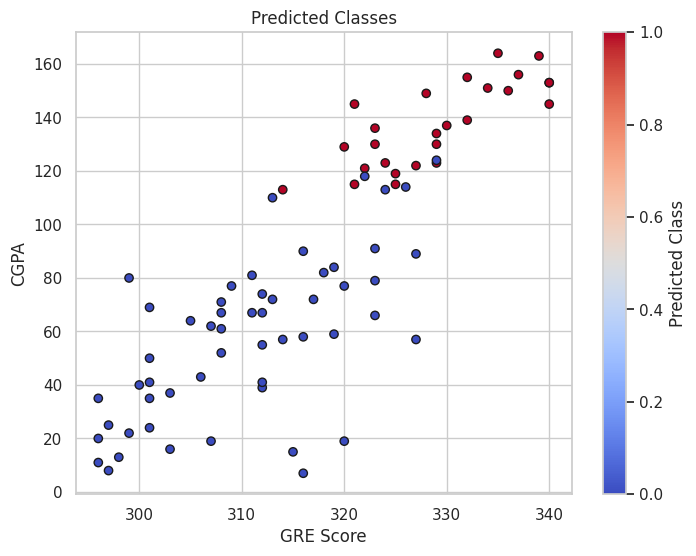

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['GRE Score'], X_test['CGPA'], c=y_pred, cmap='coolwarm', marker='o', edgecolors='k')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Predicted Classes')
plt.colorbar(label='Predicted Class')
plt.show()